In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:/Users/joshi/OneDrive/Desktop/Projects/book sales/Books_Data_Clean.csv")

In [8]:
df.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [9]:
df.describe()

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000
mean,535.926660,1994.730426,4.012230,94817.793855,1832.644985,841.360638,4.844311,613.314172,9744.482656
std,308.769358,23.204719,0.246492,31473.890412,3947.885096,2279.579848,3.561712,369.628663,15350.021050
min,0.000000,1901.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,271.000000,1989.000000,3.860000,70701.000000,366.300000,0.000000,1.990000,291.000000,570.000000
50%,535.000000,2003.000000,4.030000,89204.000000,792.000000,273.240000,3.990000,596.000000,3942.000000
75%,802.000000,2010.000000,4.180000,113400.000000,1470.260000,714.756000,6.990000,933.000000,5427.000000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


In [7]:
df = df[df["Publishing Year"]>1900]

In [15]:
df.isna().sum()

index                   0
Publishing Year         0
Book Name               0
Author                  0
language_code          47
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale price              0
sales rank              0
Publisher               0
units sold              0
dtype: int64

In [14]:
df.dropna(subset = "Book Name",inplace=True)

In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
df.nunique()

index                  988
Publishing Year        101
Book Name              987
Author                 669
language_code            8
Author_Rating            4
Book_average_rating    133
Book_ratings_count     983
genre                    4
gross sales            774
publisher revenue      570
sale price             143
sales rank             818
Publisher                9
units sold             470
dtype: int64

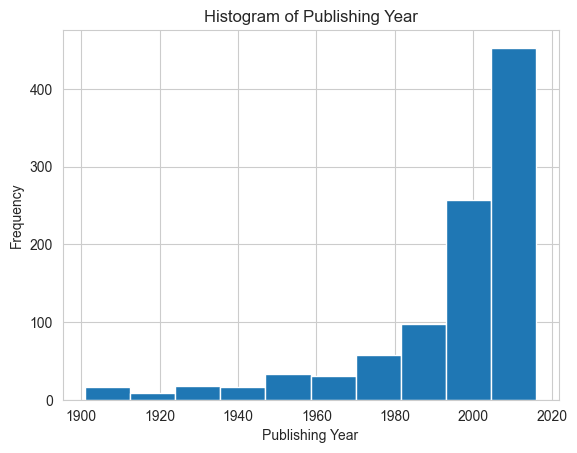

In [22]:
plt.hist(df["Publishing Year"])
plt.xlabel("Publishing Year")
plt.ylabel("Frequency")
plt.title("Histogram of Publishing Year")
plt.show()

Text(0.5, 1.0, 'Number of books in each genre')

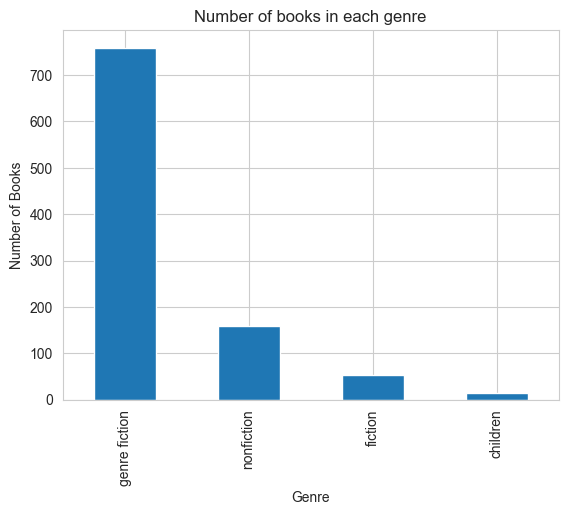

In [24]:
df["genre"].value_counts().plot(kind="bar")
plt.xlabel("Genre")
plt.ylabel("Number of Books")
plt.title("Number of books in each genre")

In [27]:
df.groupby("Author")["Book_average_rating"].mean().sort_values(ascending = False)

Author
Bill Watterson                  4.650000
Bill Watterson, G.B. Trudeau    4.610000
J.R.R. Tolkien                  4.590000
George R.R. Martin              4.560000
Sarah J. Maas                   4.526000
                                  ...   
Chetan Bhagat                   3.273333
Audrey Niffenegger              3.230000
Herman Koch, Sam Garrett        3.220000
P.D. James                      3.210000
Sue Monk Kidd                   3.100000
Name: Book_average_rating, Length: 669, dtype: float64

Text(0.5, 1.0, 'Book Ratings Count per Genre')

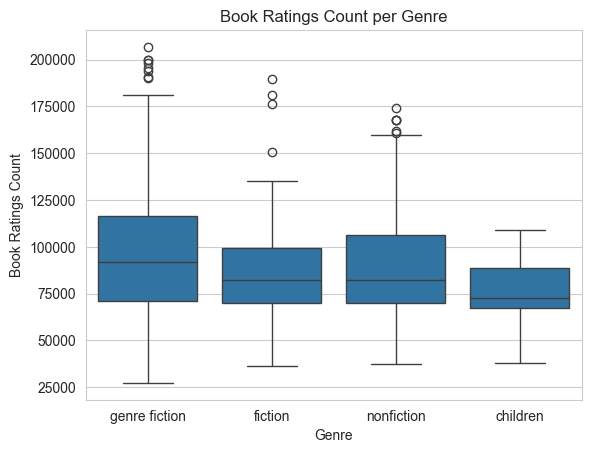

In [30]:
sns.boxplot(x= "genre", y = "Book_ratings_count", data = df)
plt.xlabel("Genre")
plt.ylabel("Book Ratings Count")
plt.title("Book Ratings Count per Genre")

Text(0.5, 1.0, 'Sales price per units sold')

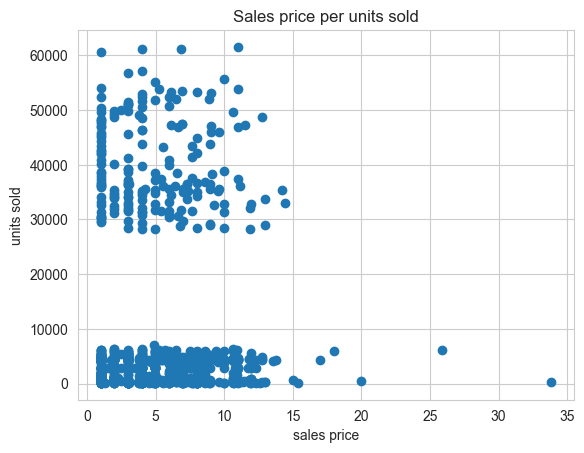

In [37]:
plt.scatter(df["sale price"],df["units sold"])
plt.xlabel("sales price")
plt.ylabel("units sold")
plt.title("Sales price per units sold")

In [41]:
df["language_code"].value_counts().sort_values(ascending = True)

language_code
nl         1
spa        2
ara        2
fre        4
en-CA      7
en-GB     29
en-US    226
eng      670
Name: count, dtype: int64

In [42]:
language_counts = df["language_code"].value_counts()

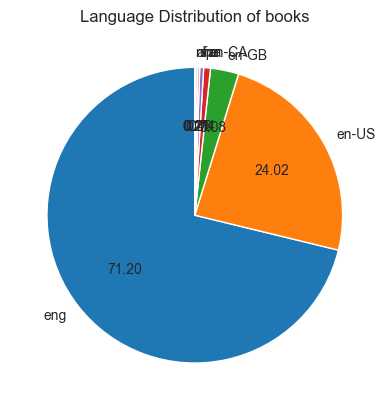

In [43]:
plt.pie(language_counts, labels = language_counts.index, startangle = 90, autopct = "%1.2f")
plt.title("Language Distribution of books")
plt.show()


In [46]:
total_gross_sales_by_author = df.groupby("Author")["gross sales"].sum()

Text(0.5, 1.0, 'Total Gross Sales for Each Author')

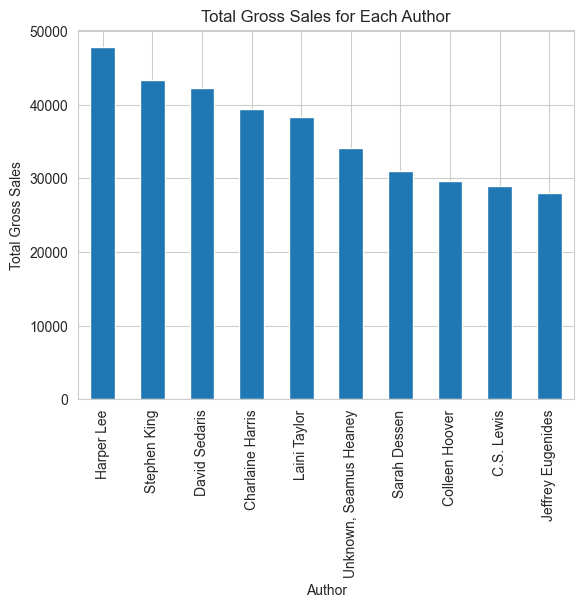

In [48]:
total_gross_sales_by_author.sort_values(ascending = False).head(10).plot(kind = "bar")
plt.xlabel("Author")
plt.ylabel("Total Gross Sales")
plt.title("Total Gross Sales for Each Author")

Text(0.5, 1.0, 'Units Sold per Author Rating')

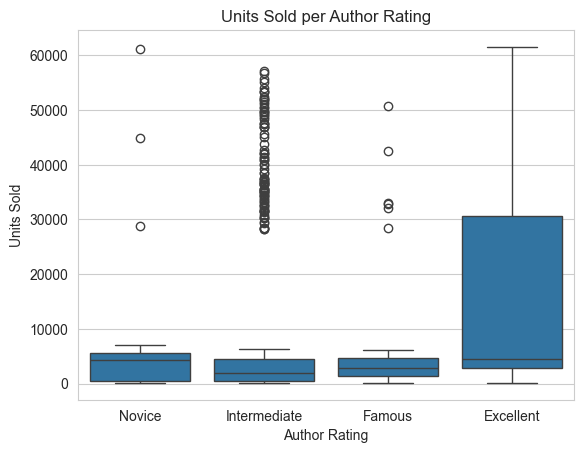

In [49]:
sns.boxplot(x="Author_Rating", y = "units sold", data = df)
plt.xlabel("Author Rating")
plt.ylabel("Units Sold")
plt.title("Units Sold per Author Rating")

Text(0.5, 1.0, 'Total Units Sold over the Years')

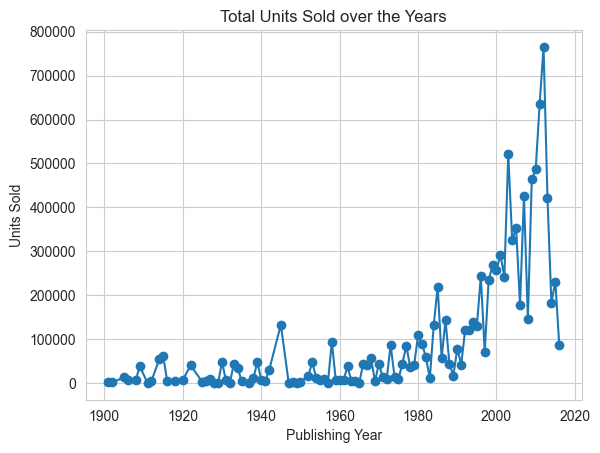

In [53]:
df.groupby("Publishing Year")["units sold"].sum().plot(kind= 'line',marker = 'o')
plt.xlabel("Publishing Year")
plt.ylabel("Units Sold")
plt.title("Total Units Sold over the Years")